In [15]:
'''This notebook models the percent length estimation error
under rotation'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns

from dblib import mssql

def cm2inch(*tupl):
    '''(tuple) -> tuple
    matplotlib uses inches for figsize,
    this wll convert inches to cm

    Example:
    >>>plt.figure(figsize=cm2inch(12.8, 9.6))
    '''
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [14]:
sql = "" \
" select sample_lengthid, platform, camera, cnn, status, accuracy," \
" case when transform='hflip' then 'horizontal' else 'none' end as flip, hw_ratio, mv_persp_corr_iter_profile_tridist_mm_error_perc as [percent error]" \
" from v_mv_long_form" \
" where (transform='none' or transform='hflip') and status='Success'" \


with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['sample_lengthid',
 'platform',
 'camera',
 'cnn',
 'status',
 'accuracy',
 'flip',
 'hw_ratio',
 'percent error']

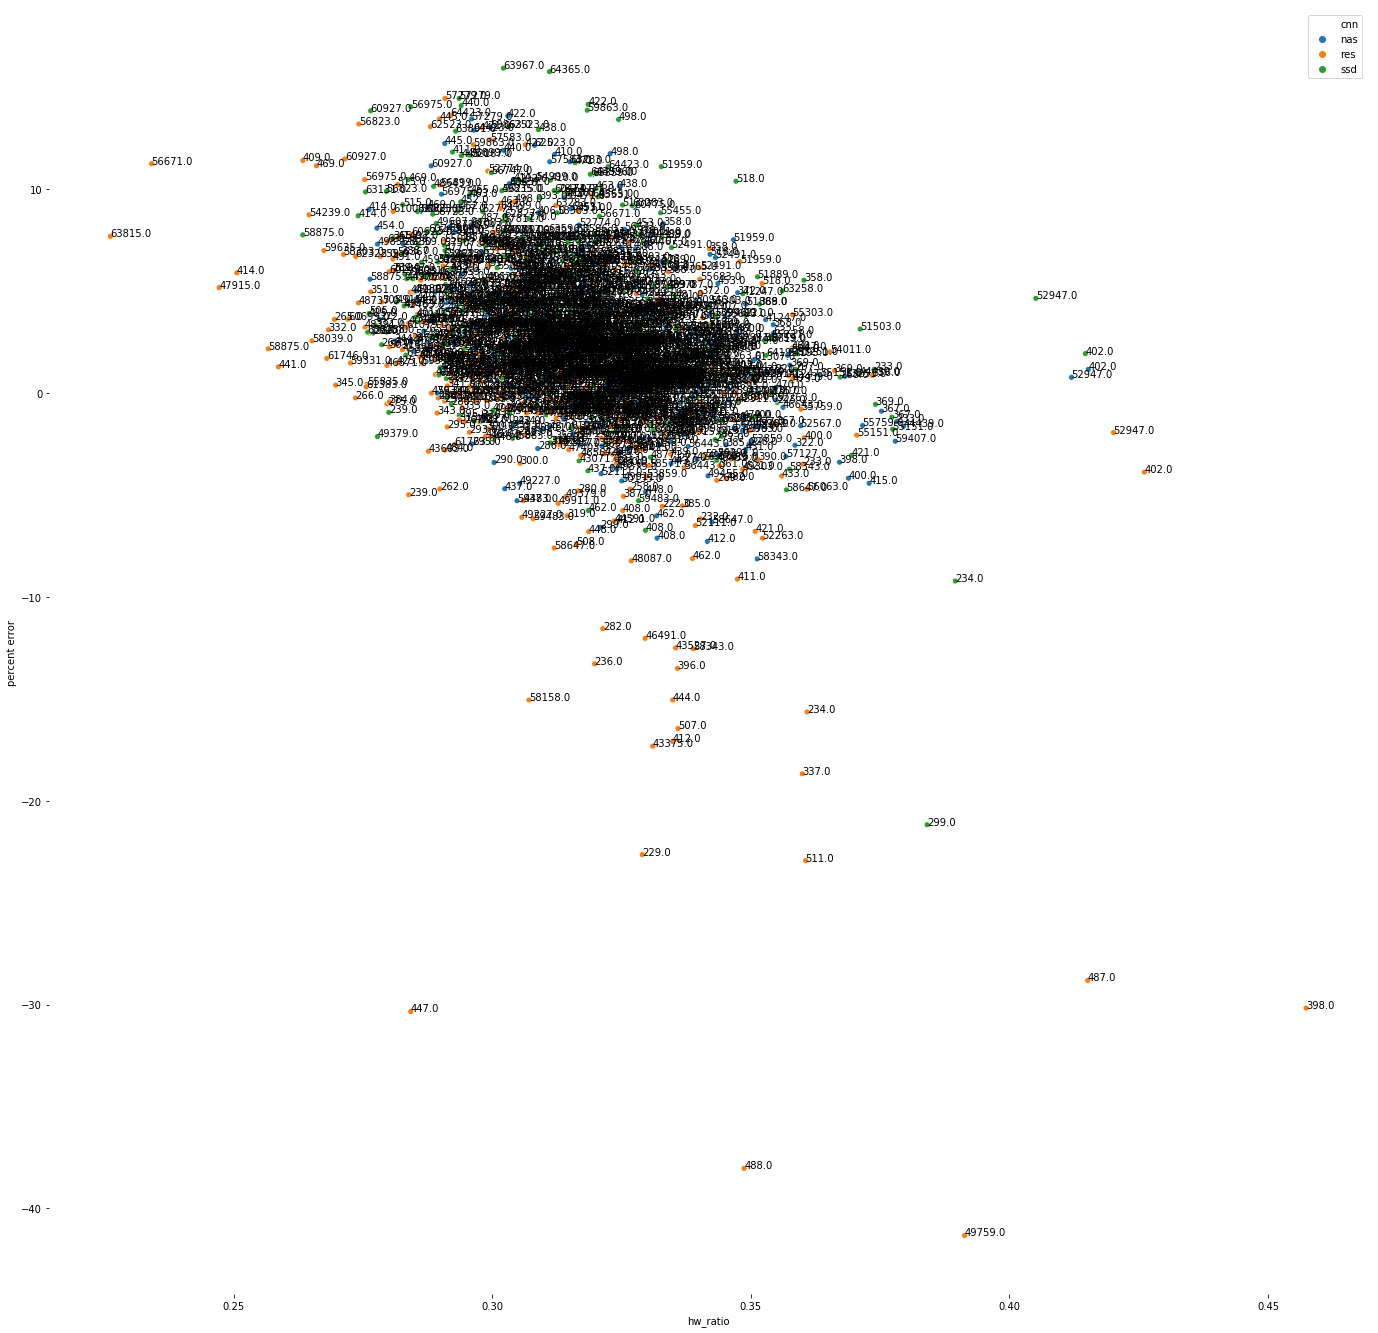

In [17]:
f, ax = plt.subplots(figsize=cm2inch(60,60))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="hw_ratio", y="percent error", hue="cnn", data=df)

label_point(df.hw_ratio, df['percent error'], df.sample_lengthid, plt.gca())


In [7]:
f, ax = plt.subplots(figsize=cm2inch(14,10))
sns.despine(f, left=True, bottom=True)
sns.lineplot(x="rotation", y="error",
             hue="cnn",
             data=df)

NameError: name 'cm2inch' is not defined

AttributeError: 'DataFrame' object has no attribute 'percent_error'